In [294]:
import pandas as pd

In [295]:
df = pd.read_excel("C:/Users/msı/Desktop/Maas Arastirmasi - Ekim 2024.xlsx")

In [296]:
df.to_csv("C:/Users/msı/Desktop/veri_dosyasi.csv", index=False)

In [297]:
df = pd.read_csv("C:/Users/msı/Desktop/veri_dosyasi.csv")

### 1 VERİ SETİ DÜZENLEMESİ

In [298]:
df = df.rename(columns={'Şirketiniz hangi lokasyonda?': 'Şirket Konumu','Tam zamanlı mı yarı zamanlı mı çalışıyorsunuz?': 'Çalışma Durumu','Çalışma şekliniz nedir?': 'Çalışma Şekli', 'Şirketinizin çalışan sayısı nedir?':'Çalışan Sayısı','Kaç yıllık deneyiminiz var?': 'Deneyim' , 'Çalıştığınız Sektor? (Otomotiv, Bankacilik, Saglik vs)': 'Sektör', 'Pozisyonunuzun Ismi?': 'Pozisyon' , 'Aylık Ortalama Net Maaşınız? (Turk Lirasi)' : 'Aylık Net Maaş (TL)', 'Yıllık ek net gelirleriniz? (prim bonus ve benzeri gelirlerin toplamı)' : 'Yıllık Ek Gelir (Prim, Bonus)', 'Yan haklarınız nelerdir?': 'Yan Haklar'})
print(df)


                    Timestamp Cinsiyet Şirket Konumu Çalışma Durumu  \
0     2024-09-25 14:51:28.469    Kadın       Türkiye    Tam zamanlı   
1     2024-09-25 14:51:40.209    Kadın     Yurt dışı    Tam zamanlı   
2     2024-09-25 14:51:54.468    Kadın       Türkiye    Tam zamanlı   
3     2024-09-25 14:52:05.596    Kadın       Türkiye    Tam zamanlı   
4     2024-09-25 14:52:22.364    Kadın       Türkiye    Tam zamanlı   
...                       ...      ...           ...            ...   
1568  2024-11-01 22:33:34.428    Kadın       Türkiye    Tam zamanlı   
1569  2024-11-02 03:03:03.180    Erkek       Türkiye    Tam zamanlı   
1570  2024-11-02 19:16:55.691    Kadın       Türkiye    Tam zamanlı   
1571  2024-11-03 23:21:43.955    Erkek       Türkiye    Tam zamanlı   
1572  2024-11-04 00:31:38.035    Erkek       Türkiye    Tam zamanlı   

     Çalışma Şekli Çalışan Sayısı     Deneyim                  Sektör  \
0           Ofiste    200 ve ustu     1-3 Yıl                  Üretim   
1

In [299]:
df = pd.DataFrame(df)
print(df)

                    Timestamp Cinsiyet Şirket Konumu Çalışma Durumu  \
0     2024-09-25 14:51:28.469    Kadın       Türkiye    Tam zamanlı   
1     2024-09-25 14:51:40.209    Kadın     Yurt dışı    Tam zamanlı   
2     2024-09-25 14:51:54.468    Kadın       Türkiye    Tam zamanlı   
3     2024-09-25 14:52:05.596    Kadın       Türkiye    Tam zamanlı   
4     2024-09-25 14:52:22.364    Kadın       Türkiye    Tam zamanlı   
...                       ...      ...           ...            ...   
1568  2024-11-01 22:33:34.428    Kadın       Türkiye    Tam zamanlı   
1569  2024-11-02 03:03:03.180    Erkek       Türkiye    Tam zamanlı   
1570  2024-11-02 19:16:55.691    Kadın       Türkiye    Tam zamanlı   
1571  2024-11-03 23:21:43.955    Erkek       Türkiye    Tam zamanlı   
1572  2024-11-04 00:31:38.035    Erkek       Türkiye    Tam zamanlı   

     Çalışma Şekli Çalışan Sayısı     Deneyim                  Sektör  \
0           Ofiste    200 ve ustu     1-3 Yıl                  Üretim   
1

In [300]:
# İstediğiniz sütunları kaldırma
df = df.drop(columns=["Timestamp", "Temmuz & Ağustos dönemi zam oranınız nedir?"])

# Değişiklikleri kalıcı olarak kaydetme
df.to_csv("C:/Users/msı/Desktop/veri_dosyasi.csv", index=False)

### 2 CİNSİYETE GÖRE ÇALIŞMA DURUMU ANALİZİ

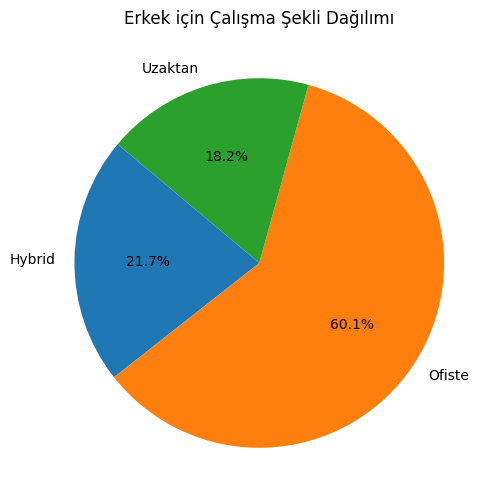

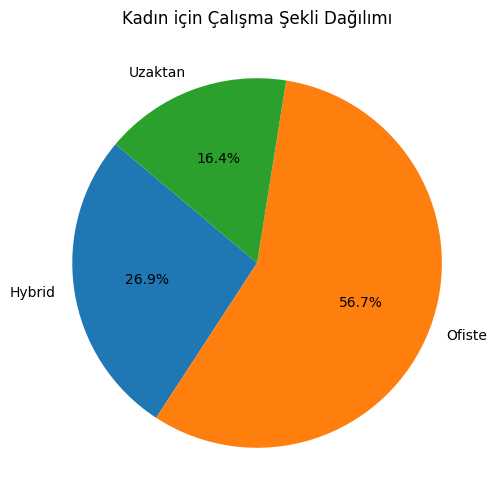

In [318]:
import matplotlib.pyplot as plt

# Cinsiyet sütunundaki boşlukları temizleyelim ve 'belirtmek istemiyorum' olanları çıkaralım
df['Cinsiyet'] = df['Cinsiyet'].str.strip()  # Boşlukları temizler
df = df[df['Cinsiyet'] != 'Belirtmek Istemiyorum']  # 'belirtmek istemiyorum' kategorisini çıkarır


# Grup verisini örnek olarak alalım (Cinsiyet ve Çalışma Şekli bazında)
grup_verisi = df.groupby(['Cinsiyet', 'Çalışma Şekli']).size().unstack(fill_value=0)

# Oranları hesaplayalım
oranlar = grup_verisi.apply(lambda x: x / x.sum(), axis=1)

# Her cinsiyet için pasta grafiği oluşturma
for cinsiyet, row in oranlar.iterrows():
    plt.figure(figsize=(6, 6))
    plt.pie(row, labels=row.index, autopct="%1.1f%%", startangle=140)
    plt.title(f"{cinsiyet} için Çalışma Şekli Dağılımı")
    plt.show()


### 3 DENEYİME GÖRE AYLIK NET MAAŞ ANALİZİ

Toplam maaş: 61945500


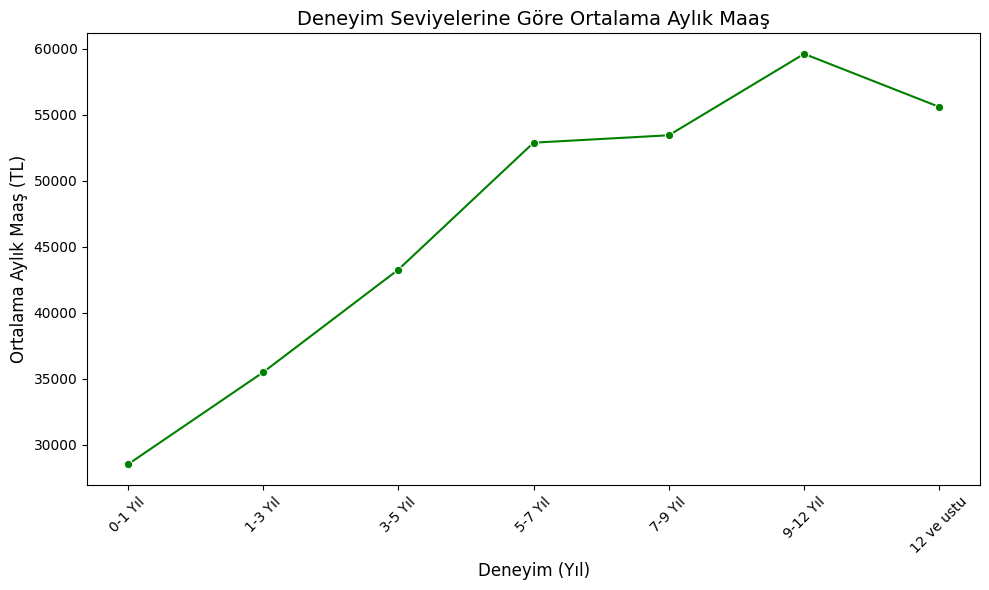

In [316]:
import re
import seaborn as sns
import matplotlib.pyplot as plt

# "TL" ifadesini, noktalama işaretlerini ve "ve üstü" gibi metinleri kaldırma ve maaş aralıklarını sayıya dönüştürme
def maaş_aralığı_ortalama(maas_araligi):
    # Eğer gelen veri sayısal ise, önce string'e çeviriyoruz
    maas_araligi = str(maas_araligi).replace('TL', '').replace('.', '').strip()
    
    # "ve üstü" gibi ifadeleri temizleyip, yalnızca sayısal kısmı alıyoruz
    if "ve üstü" in maas_araligi:
        maas_araligi = re.sub(r'\D', '', maas_araligi)  # Yalnızca sayıları bırak
        return int(maas_araligi)  # "ve üstü" varsa, min değeri almak yerine o değeri alıyoruz.
    
    # Eğer aralık varsa, '-' ile bölüp ortalama hesaplıyoruz
    if '-' in maas_araligi:
        min_maas, max_maas = map(int, maas_araligi.split('-'))
        return (min_maas + max_maas) / 2
    else:
        return int(maas_araligi)  # Tek bir değer varsa, onu return ediyoruz

# "Aylık Net Maaş (TL)" sütununu işleyip, yeni bir sütun ekliyoruz
df['Maaş (Ortalama)'] = df['Aylık Net Maaş (TL)'].apply(maaş_aralığı_ortalama)

# Ortalamaları integer'a çeviriyoruz
df['Maaş (Ortalama)'] = df['Maaş (Ortalama)'].astype(int)

# Deneyim yılına göre maaşların toplamını hesaplama
deneyim_gruplama = df.groupby('Deneyim')['Maaş (Ortalama)'].sum().reset_index()

# Tüm maaşların toplamını hesaplamak
toplam_maas = df['Maaş (Ortalama)'].sum()

print("Toplam maaş:", toplam_maas)

# Deneyim seviyelerini sayısal verilere dönüştürme
def deneyim_sayisal(deger):
    if '0-1' in deger:
        return 1
    elif '1-3' in deger:
        return 2
    elif '3-5' in deger:
        return 4
    elif '5-7' in deger:
        return 6
    elif '7-9' in deger:
        return 8
    elif '9-12' in deger:
        return 10
    elif '12 ve ustu' in deger:
        return 12
    else:
        return 0  # Varsayılan değer

# "Deneyim" sütununu sayısal verilere dönüştürme
df['Deneyim (Sayısal)'] = df['Deneyim'].apply(deneyim_sayisal)

# Deneyim seviyelerine göre ortalama maaşları hesaplama
deneyim_ortalama_maas = df.groupby('Deneyim')['Maaş (Ortalama)'].mean().reset_index()

# Deneyimi sayısal veriye göre sıralama
deneyim_ortalama_maas['Deneyim (Sayısal)'] = deneyim_ortalama_maas['Deneyim'].apply(deneyim_sayisal)
deneyim_ortalama_maas = deneyim_ortalama_maas.sort_values('Deneyim (Sayısal)', ascending=True)

# Grafik boyutlarını ayarlama
plt.figure(figsize=(10, 6))

# Lineplot ile deneyim seviyelerine göre ortalama maaşı gösterme
sns.lineplot(x='Deneyim', y='Maaş (Ortalama)', data=deneyim_ortalama_maas, marker='o', color='g')

# Grafik başlığını ekleme
plt.title('Deneyim Seviyelerine Göre Ortalama Aylık Maaş', fontsize=14)
plt.xlabel('Deneyim (Yıl)', fontsize=12)
plt.ylabel('Ortalama Aylık Maaş (TL)', fontsize=12)

# X eksenindeki etiketleri döndürme
plt.xticks(rotation=45)

# Grafik gösterimi
plt.tight_layout()
plt.show()



### 4 POZİSYONA GÖRE YILLIK EK GELİR ANALİZİ

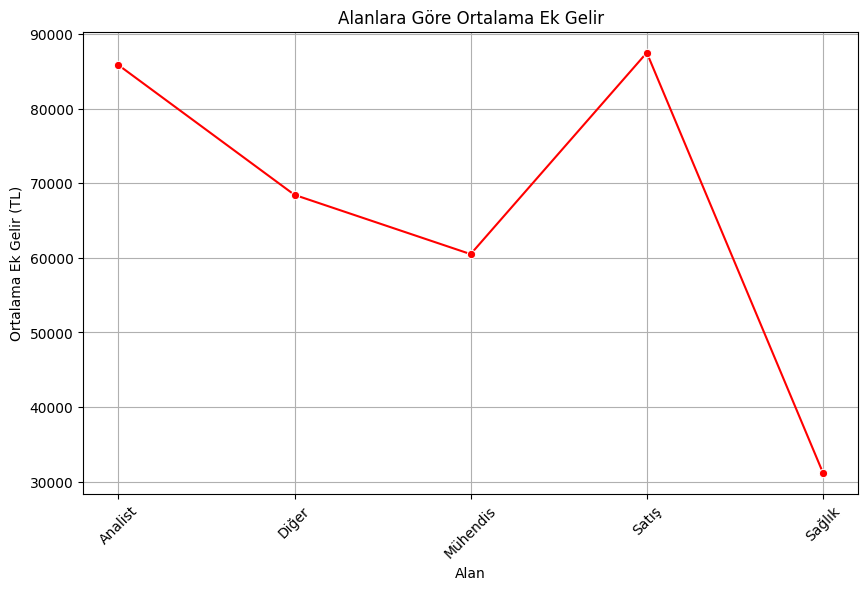

In [303]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Alanları ve pozisyonları eşleştiren sözlük
alan_sozluk = {
    'Mühendis': ['Çevre Mühendisi', 'Saha mühendisi', 'İnşaat mühendisi', 'Yazılım mühendisi', 'Aday Mühendis', 'Arge Mühendisi', 'Üretim mühendisi', 'Endüstri mühendisi'],
    'Analist': ['Analist', 'Business Analyst', 'İş analisti', 'Business Solutions Specialist'],
    'Satış': ['Satış ve pazarlama asistanı', 'Satış müdürü', 'Satış destek mühendisi'],
    'Sağlık': ['Hemşire', 'Klinik psikolog', 'Pratisyen hekim', 'Kimyager', 'Diyetisyen', 'Eczacı', 'Veteriner teknikeri'],
    'Diğer': ['Avukat', 'Stajyer', 'Uzman', 'Sorumlu', 'Öğretmen', 'Mimar', 'Sekreter']
}

# Pozisyonları alanlara atayan fonksiyon
def pozisyonu_alana_ata(pozisyon):
    for alan, pozisyonlar in alan_sozluk.items():
        if pozisyon in pozisyonlar:
            return alan
    return None  # Pozisyon eşleşmiyorsa None döner

# Yeni 'Alan' sütunu oluşturuyoruz
df['Alan'] = df['Pozisyon'].apply(pozisyonu_alana_ata)

# Ek Gelir sütunundaki "TL" ifadelerini temizleyip ortalama değerleri almak için fonksiyon
def ek_gelir_ortalama(gelir):
    if pd.isna(gelir):
        return None
    gelir = gelir.replace(" TL", "").replace(".", "").strip()  # TL ve noktaları kaldırıyoruz
    if "-" in gelir:
        min_gelir, max_gelir = map(int, gelir.split('-'))
        return (min_gelir + max_gelir) / 2
    elif "ve üstü" in gelir:
        return int(re.search(r'\d+', gelir).group())  # "ve üstü" olan değerin minimum kısmını alıyoruz
    return None

# 'Ek Gelir (Ortalama)' sütunu oluşturuyoruz
df['Ek Gelir (Ortalama)'] = df['Yıllık Ek Gelir (Prim, Bonus)'].apply(ek_gelir_ortalama)

# Sadece geçerli alan ve ek gelir ortalaması olan satırları alıyoruz
df_analiz = df.dropna(subset=['Alan', 'Ek Gelir (Ortalama)'])

# Alan bazında ortalama ek geliri hesaplıyoruz
alan_gelir_ortalama = df_analiz.groupby('Alan')['Ek Gelir (Ortalama)'].mean().reset_index()

# Seaborn lineplot ile görselleştirme
plt.figure(figsize=(10, 6))
sns.lineplot(data=alan_gelir_ortalama, x='Alan', y='Ek Gelir (Ortalama)', marker='o', color='r')

# Başlık ve etiketler
plt.title('Alanlara Göre Ortalama Ek Gelir')
plt.xlabel('Alan')
plt.ylabel('Ortalama Ek Gelir (TL)')
plt.xticks(rotation=45)  # X eksenindeki alan isimlerini döndürüyoruz
plt.grid(True)  # Grid ekliyoruz

# Grafiği gösteriyoruz
plt.show()


### 5 SEKTÖRE GÖRE ÇALIŞMA ŞEKLİ DAĞILIMI

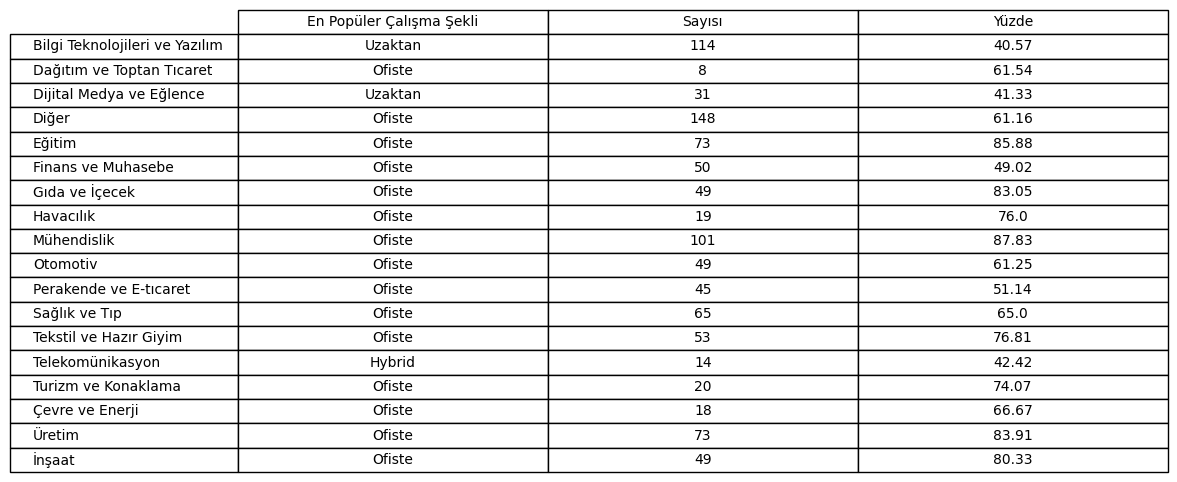

In [304]:
import pandas as pd
import matplotlib.pyplot as plt

# Sektör ve Çalışma Şekli'ne göre sayıları grupla
gruplama = df.groupby(['Sektör', 'Çalışma Şekli']).size().unstack(fill_value=0)

# Her sektör için en çok kullanılan çalışma şekli
en_populer = gruplama.idxmax(axis=1)

# Her sektör için en popüler çalışma şekli sayısını al
en_populer_sayisi = gruplama.max(axis=1)

# Yüzde hesaplama (her sektör için en popüler çalışma şekli oranı)
en_populer_yuzde = (en_populer_sayisi / gruplama.sum(axis=1)) * 100

# Her sektör için en popüler çalışma şekli, sayısı ve yüzdesini tek bir tablo halinde birleştir
sonuc = pd.DataFrame({
    'En Popüler Çalışma Şekli': en_populer,
    'Sayısı': en_populer_sayisi,
    'Yüzde': en_populer_yuzde.round(2)  # Yüzdeleri yuvarlıyoruz
})

# Görselleştirme: Pandas DataFrame'ini tablo olarak görselleştir
fig, ax = plt.subplots(figsize=(12, 6))  # Tablonun boyutunu ayarlıyoruz
ax.axis('tight')  # Grafik sınırlarını sıkıştırıyoruz
ax.axis('off')  # Eksenleri gizliyoruz

# Tabloyu çizdiriyoruz
table = ax.table(cellText=sonuc.values,
                colLabels=sonuc.columns,
                rowLabels=sonuc.index,  # Sektör sütununu ekliyoruz
                loc='center',
                cellLoc='center',
                bbox=[0, 0, 1, 1])  # Tabloyu ortalıyoruz

# Tabloyu göster
plt.show()

### 6 ÇALIŞAN SAYISINA GÖRE MAAŞ DAĞILIMI

Küçük şirketlerin maaş ortalaması: 34794.921875 TL
Büyük şirketlerin maaş ortalaması: 43973.78277153558 TL
Aradaki maaş farkı: 9178.860896535582 TL


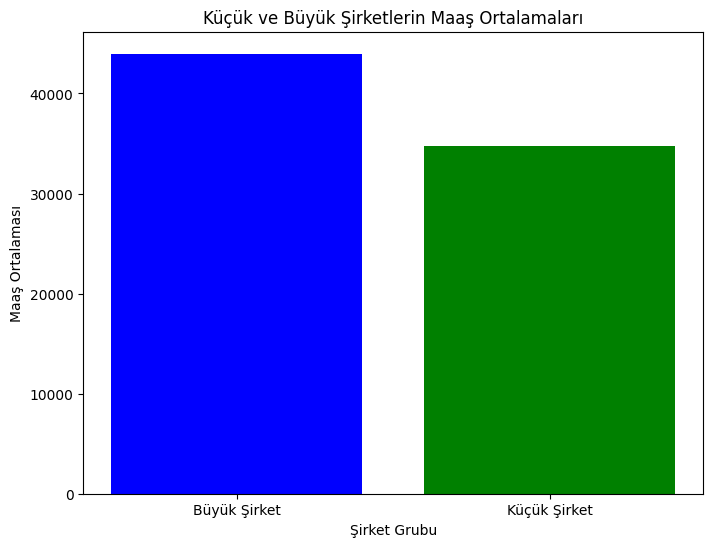

In [305]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# 'Çalışan Sayısı' kategorisini küçük ve büyük şirket olarak ayırmak için
def ayir_sirket_grubu(calisan_sayisi):
    if calisan_sayisi in ['1-49', '50-99', '100-149']:
        return 'Küçük Şirket'
    else:
        return 'Büyük Şirket'

# Maaş sütunundaki 'TL' ifadesini temizle ve "120.000 TL ve üstü" ifadesini 120000 olarak kabul et
def maaş_aralığı_ortalama(maas_araligi):
    maas_araligi = str(maas_araligi).replace('TL', '').replace('.', '').strip()
    
    if "ve üstü" in maas_araligi:
        maas_araligi = re.sub(r'\D', '', maas_araligi)  # Yalnızca sayıları bırak
        return int(maas_araligi)
    
    if '-' in maas_araligi:
        min_maas, max_maas = map(int, maas_araligi.split('-'))
        return (min_maas + max_maas) / 2
    else:
        return int(maas_araligi)  # Tek bir değer varsa, onu return ediyoruz

# Örnek veri çerçevesi (df)
# df = pd.DataFrame(...) # Burada veri çerçevesi olduğunu varsayalım

# 'Çalışan Sayısı' kategorisini küçük ve büyük şirket olarak ayırmak için
df['Şirket Grubu'] = df['Çalışan Sayısı'].apply(ayir_sirket_grubu)

# "Aylık Net Maaş (TL)" sütununu işleyip, yeni bir sütun ekliyoruz
df['Maaş (Ortalama)'] = df['Aylık Net Maaş (TL)'].apply(maaş_aralığı_ortalama)

# Ortalamaları integer'a çeviriyoruz
df['Maaş (Ortalama)'] = df['Maaş (Ortalama)'].astype(int)

# Maaş ortalamalarını grup bazında alıyoruz
maas_ortalama = df.groupby('Şirket Grubu')['Maaş (Ortalama)'].mean().reset_index()

# Küçük ve büyük şirketlerin maaş ortalamaları
kucuk_sirket_maas = maas_ortalama[maas_ortalama['Şirket Grubu'] == 'Küçük Şirket']['Maaş (Ortalama)'].values[0]
buyuk_sirket_maas = maas_ortalama[maas_ortalama['Şirket Grubu'] == 'Büyük Şirket']['Maaş (Ortalama)'].values[0]

# Maaş farkını hesapla
maas_farki = buyuk_sirket_maas - kucuk_sirket_maas

# Farkı yazdır
print(f"Küçük şirketlerin maaş ortalaması: {kucuk_sirket_maas} TL")
print(f"Büyük şirketlerin maaş ortalaması: {buyuk_sirket_maas} TL")
print(f"Aradaki maaş farkı: {maas_farki} TL")

# Görselleştirme: Küçük ve büyük şirketler arasındaki maaş ortalamalarını bar grafiği ile göster
plt.figure(figsize=(8, 6))
plt.bar(maas_ortalama['Şirket Grubu'], maas_ortalama['Maaş (Ortalama)'], color=['blue', 'green'])

# Başlık ve etiketler
plt.title('Küçük ve Büyük Şirketlerin Maaş Ortalamaları')
plt.xlabel('Şirket Grubu')
plt.ylabel('Maaş Ortalaması')

# Grafiği göster
plt.show()

### 7 CİNSİYETE VE ÇALIŞMA ŞEKLİNE GÖRE MAAŞ ANALİZİ

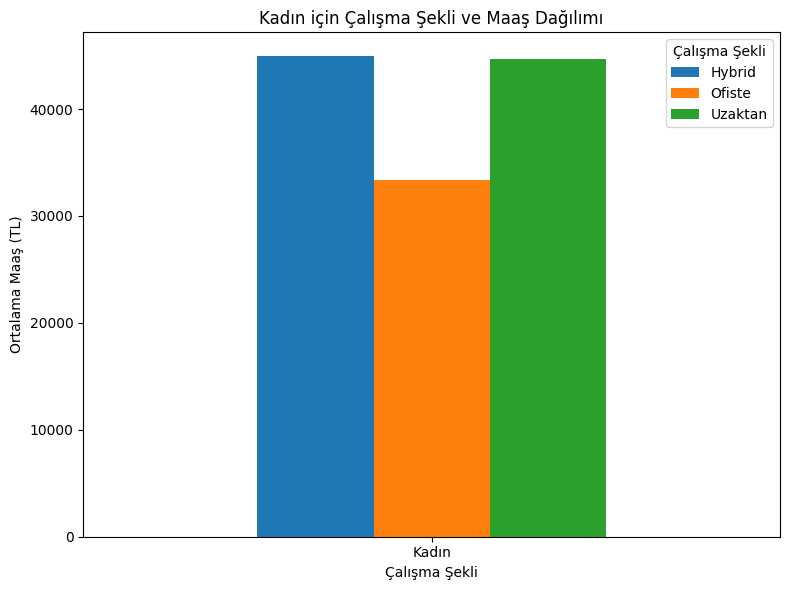

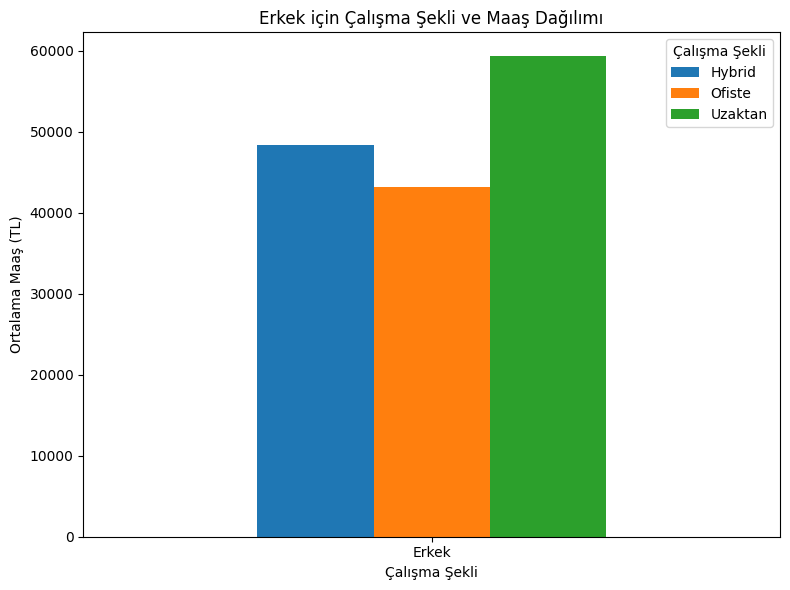

In [306]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Maaş aralıklarının ortalamasını hesaplama fonksiyonu
def maas_aralik_ortalama(maas_araligi):
    if isinstance(maas_araligi, str):  # Eğer veri string türündeyse
        # "TL" ve noktaları kaldırıyoruz
        maas_araligi = maas_araligi.replace(' TL', '').replace('.', '')
        
        # "ve üstü" içeren ifadeleri doğrudan belirli bir değere dönüştürme
        if 've üstü' in maas_araligi:
            return int(maas_araligi.split()[0])  # Sadece sayı kısmını alıyoruz
        # Eğer değer bir aralık içeriyorsa ortalama al
        elif '-' in maas_araligi:
            alt, ust = maas_araligi.split('-')
            alt = int(alt)
            ust = int(ust)
            return (alt + ust) // 2  # Ortalamayı tam sayı olarak alıyoruz
    elif isinstance(maas_araligi, (int, float)):  # Eğer veri zaten sayısal ise
        return maas_araligi  # Sayısal değeri olduğu gibi geri döneriz
    return None  # Diğer durumlar için None döneriz

# Cinsiyet sütunundaki boşlukları temizleyelim ve 'belirtmek istemiyorum' olanları çıkaralım
df['Cinsiyet'] = df['Cinsiyet'].str.strip()  # Boşlukları temizler
df = df[df['Cinsiyet'] != 'Belirtmek Istemiyorum']  # 'belirtmek istemiyorum' kategorisini çıkarır

# Maas sütunundaki her değere ortalama hesaplayan fonksiyonu uygulama
df['Aylık Net Maaş (TL)'] = df['Aylık Net Maaş (TL)'].apply(maas_aralik_ortalama)

# Her cinsiyet için sütun grafiği oluşturma
for cinsiyet in df['Cinsiyet'].unique():
    # Cinsiyete göre filtreleme
    cinsiyet_df = df[df['Cinsiyet'] == cinsiyet]

    # Cinsiyet ve çalışma şekline göre maaş ortalamasını hesaplama
    grouped_df = cinsiyet_df.groupby(['Cinsiyet', 'Çalışma Şekli'])['Aylık Net Maaş (TL)'].mean().unstack()

    # Grafiği çizme
    fig, ax = plt.subplots(figsize=(8, 6))

    # Sütun grafiğini çizme
    grouped_df.plot(kind='bar', ax=ax, legend=True)

    ax.set_title(f"{cinsiyet} için Çalışma Şekli ve Maaş Dağılımı")
    ax.set_xlabel("Çalışma Şekli")
    ax.set_ylabel("Ortalama Maaş (TL)")

    plt.xticks(rotation=0)  # X eksenindeki etiketleri düz tut
    plt.tight_layout()
    plt.show()
